In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('framingham.csv')

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
total_null_values = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total values present are ",df.shape[0])
total_missing_data = (pd.concat([total_null_values,percentage.round(2)],axis=1,keys=['Total Missing','In precentage']))
total_missing_data

Total values present are  4238


,Total Missing,In precentage
glucose,388,9.16
education,105,2.48
BPMeds,53,1.25
totChol,50,1.18
cigsPerDay,29,0.68
BMI,19,0.45
heartRate,1,0.02
male,0,0.00
age,0,0.00
currentSmoker,0,0.00


In [ ]:
df = df.dropna(subset=['heartRate','BMI','cigsPerDay','totChol','BPMeds'])

In [ ]:
df['glucose'].fillna(value = df['glucose'].mean(),inplace=True)

In [ ]:
df['education'].fillna(value = df['education'].mean(),inplace=True)

In [ ]:
total_null_values = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total values present are ",df.shape[0])
total_missing_data = (pd.concat([total_null_values,percentage.round(2)],axis=1,keys=['Total Missing','In precentage']))
total_missing_data

Total values present are  4088


,Total Missing,In precentage
male,0,0.0
age,0,0.0
education,0,0.0
currentSmoker,0,0.0
cigsPerDay,0,0.0
BPMeds,0,0.0
prevalentStroke,0,0.0
prevalentHyp,0,0.0
diabetes,0,0.0
totChol,0,0.0


In [ ]:
df['TenYearCHD'].value_counts()

0    3477
1     611
Name: TenYearCHD, dtype: int64

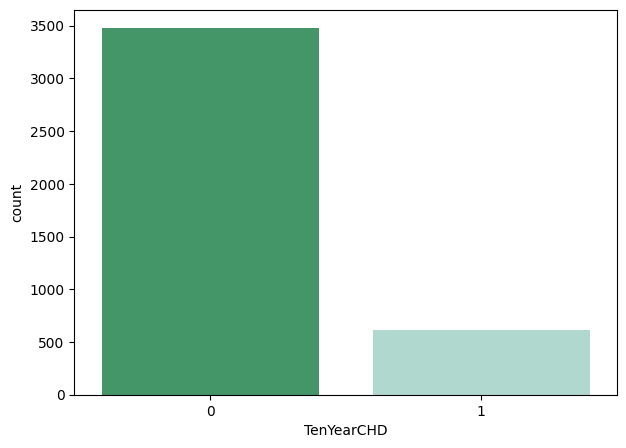

In [ ]:
plt.figure(figsize = (7, 5))
sns.countplot(x ='TenYearCHD', data =df,
             palette ="BuGn_r" )
plt.show()

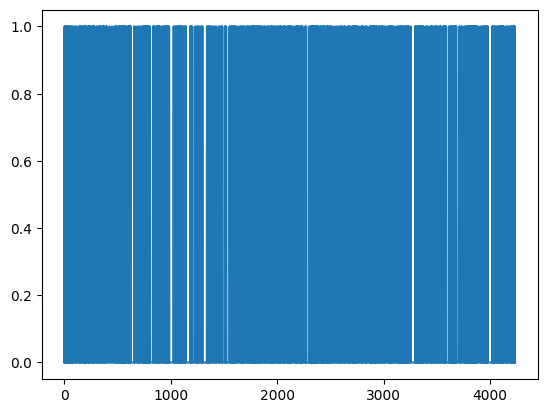

In [ ]:
laste = df['TenYearCHD'].plot()
plt.show(laste)


In [ ]:
correlation = df.corr()

In [ ]:
print(correlation['TenYearCHD'])

male               0.096060
age                0.226849
education         -0.053270
currentSmoker      0.025360
cigsPerDay         0.063060
BPMeds             0.085618
prevalentStroke    0.044186
prevalentHyp       0.173806
diabetes           0.089132
totChol            0.080676
sysBP              0.214921
diaBP              0.147684
BMI                0.076643
heartRate          0.025715
glucose            0.119826
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


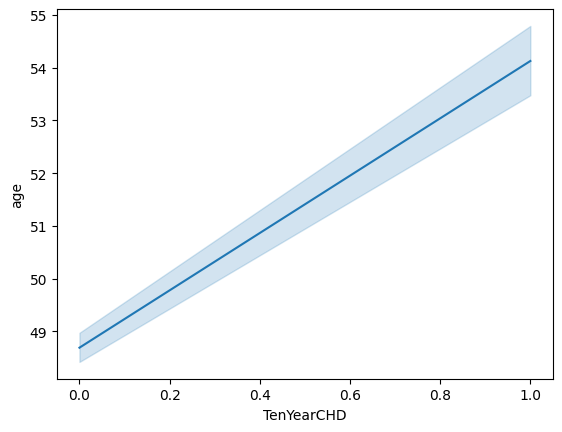

In [ ]:
sns.lineplot(x='TenYearCHD',y='age',data=df)
plt.show()

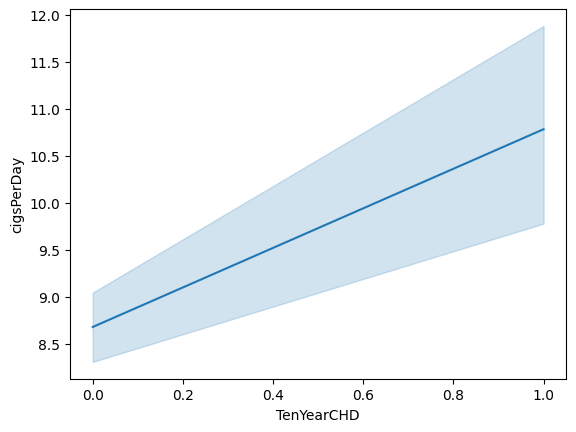

In [ ]:
#Visualising relation between age and ciggarates per day.
sns.lineplot(x='TenYearCHD',y='cigsPerDay',data=df)
plt.show()


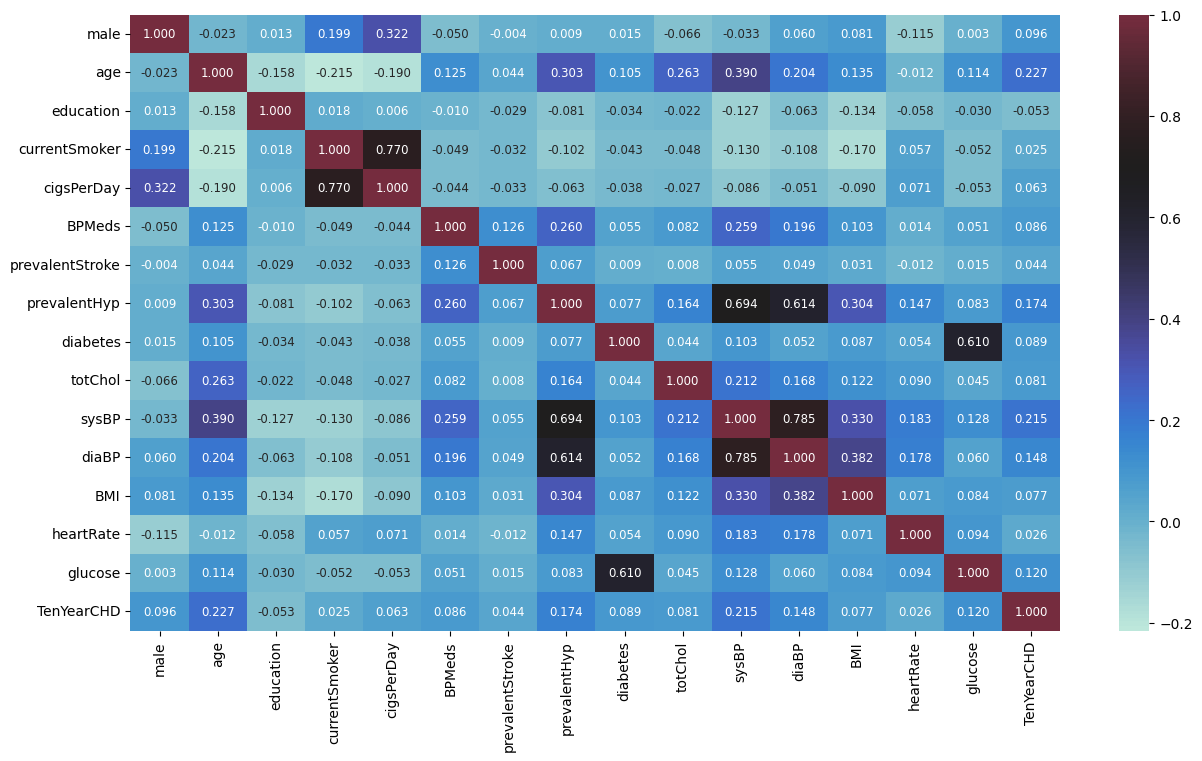

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation,cbar=True,fmt='.3f',annot=True,annot_kws={'size':8.5},center=0.7)
plt.show()

Logistic Regression Model

In [ ]:
from sklearn import preprocessing
'exec(% matplotlib inline)'

'exec(% matplotlib inline)'

In [ ]:
X = np.asarray(df[['age', 'cigsPerDay',
						'totChol', 'sysBP', 'glucose']])
y = np.asarray(df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size = 0.3, random_state = 4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)


Train set: (2861, 5) (2861,)
Test set: (1227, 5) (1227,)


In [ ]:
model = LogisticRegression().fit(X_train,y_train)

In [ ]:
y_predict = model.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [ ]:
accuracy_score(y_predict,y_test)*100

84.10757946210269

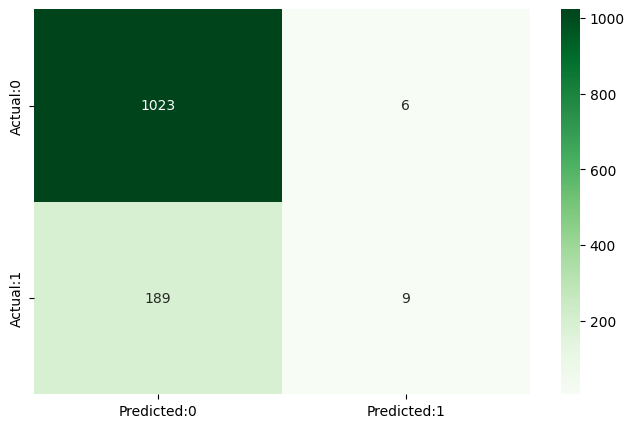

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1029
           1       0.60      0.05      0.08       198

    accuracy                           0.84      1227
   macro avg       0.72      0.52      0.50      1227
weighted avg       0.80      0.84      0.78      1227



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
conf_matrix = pd.DataFrame(data = cm,
						columns = ['Predicted:0', 'Predicted:1'],
						index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

print('The details for confusion matrix is =')
print (classification_report(y_test, y_predict))


